# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

# Loading the dataset
iris_dataset_url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz"
df_iris = pd.read_csv(iris_dataset_url, sep="\t")

# Show a random sample of 10 rows
df_iris.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,target
27,5.1,3.5,1.4,0.3,0
137,7.7,3.0,6.1,2.3,2
43,5.1,3.5,1.4,0.2,0
84,5.5,2.6,4.4,1.2,1
91,6.8,3.2,5.9,2.3,2
70,4.6,3.6,1.0,0.2,0
46,6.7,3.3,5.7,2.5,2
128,6.4,3.2,4.5,1.5,1
12,5.3,3.7,1.5,0.2,0
99,5.0,2.3,3.3,1.0,1


For this final projects, I selected the Iris dataset, a well-known dataset in machine learning that contains measurements of iris flowers along with their species labels. 

After loading the dataset and displaying a random sample of 10 rows, I can observe that the dataset includes five columns: 
* 4 numerical feature columns: sepal length, sepal width, petal length, and petal width
* 1 target column indicating the three species (Iris Setosa, Iris Versicolour, Iris Virginica). The target classes appear as integers (0, 1, 2)

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [9]:
# YOUR CODE HERE

# List all columns
print(f"The columns of the dataset: {list(df_iris.columns)} \n")

# Show descriptive statistics
# ----------------------------------------------------------------------------
# 1- Consider feature columns only 
print("-------------- FEATURE COLUMNS --------------")
feature_columns = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
print(df_iris[feature_columns].describe())

# 2- Consider the target column: show counts of each species
print("-------------- TARGET COLUMN --------------")
print(df_iris['target'].value_counts())

# 3- Missing values Verfication 
print("-------------- Check for missing values --------------")
print(f"The total number of missing values in the dataset : \n{df_iris.isnull().sum()}")

The columns of the dataset: ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target'] 

-------------- FEATURE COLUMNS --------------
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
-------------- TARGET COLUMN --------------
target
2    50
1    50
0    50
Name: count, dtype: int64
-------------- Check for missing values --------------
The total number of missing values in the dataset : 
sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
target          0
dtype: int64

#### Column Descriptions and Statistical Summary
The Iris dataset contains five columns representing flower measurements and species labels. Below are descriptions of each column, followed by key statistical insights based on the dataset’s summary statistics. 
<br/><br/>
**Column Descriptions:**
* **sepal-length** <br/>
The length of the sepal measured in centimeters.\
The sepal is the part of the flower that lies underneath the petals and protects them when the flower is still a bud. Measuring its length helps give an idea of the overall size of the flower.
* **sepal-width** \
The width of the sepal in centimeters.\
While *sepal-length* captures how tall the structure is, *sepal-width* measures how broad it is. Together, these two measurements describe the general shape of this part of the flower.
* **petal-length** \
The length of the petals in centimeters. \
*Petal length* tends to show larger differences across species, which is why it’s often very helpful in distinguishing between the three *iris* types.
* **petal-width**\
The width of the petals in centimeters.\
Like *petal length*, this measurement differs significantly among species.
* **target**\
Encoded species label:
    - 0 = "Iris Setosa"
    - 1 = "Iris Versicolor"
    - 2 = "Iris Virginica"

<br/><br/>
**Statistical Summary of the Numeric Features:**
* **General Observations** \
All four measurements have 150 entries, meaning no feature values are missing
* **sepal-length**
    - Mean: ~5.84 cm
    - Range: 4.3 to 7.9 cm
    - Moderate variability (std ~0.83)
* **sepal-width**
    - Mean: ~3.05 cm
    - Range: 2.0 to 4.4 cm
    - Lowest variability (std ~0.43), indicating this attribute stays relatively consistent
* **petal-length**
    - Mean: ~3.76 cm
    - Range: 1.0 to 6.9 cm
    - High variability (std ~1.76), reflecting strong species differences
* **petal-width**
    - Mean: ~1.20 cm
    - Range: 0.1 to 2.5 cm
    - Also highly variable (std ~0.76), useful for classification
* **Distribution of the Species (Target Column)**
    - 50 samples labeled as 0 (Setosa)
    - 50 samples labeled as 1 (Versicolor)
    - 50 samples labeled as 2 (Virginica) \
    =>This perfectly balanced distribution ensures that no species dominates the dataset
* **Missing Values Check**
    - There are zero missing values across all columns \
    => This means the dataset is clean and ready for further analysis without requiring imputation or cleaning


### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

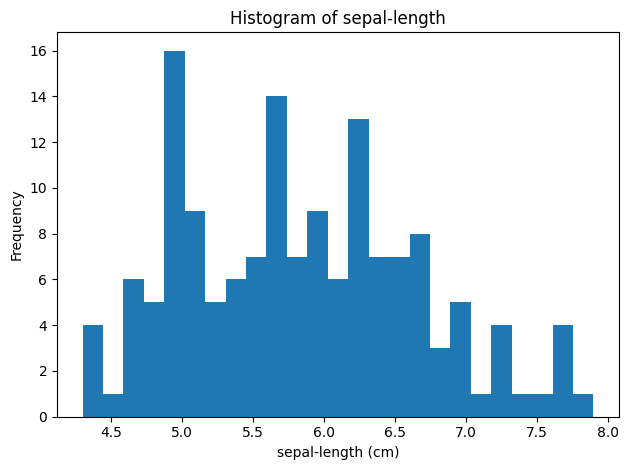

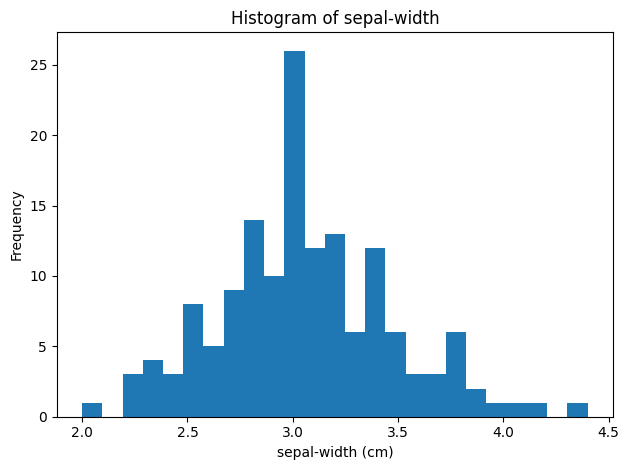

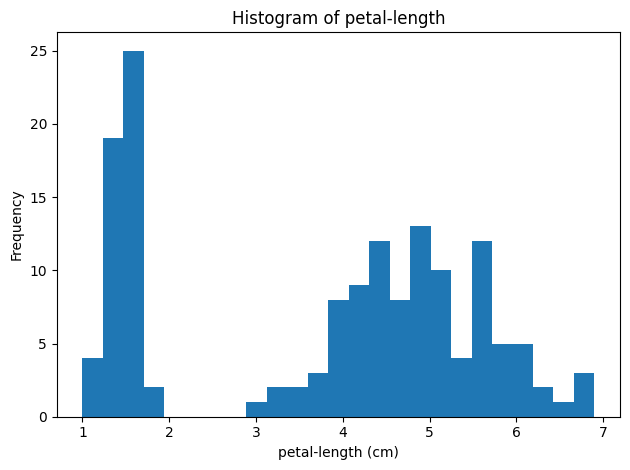

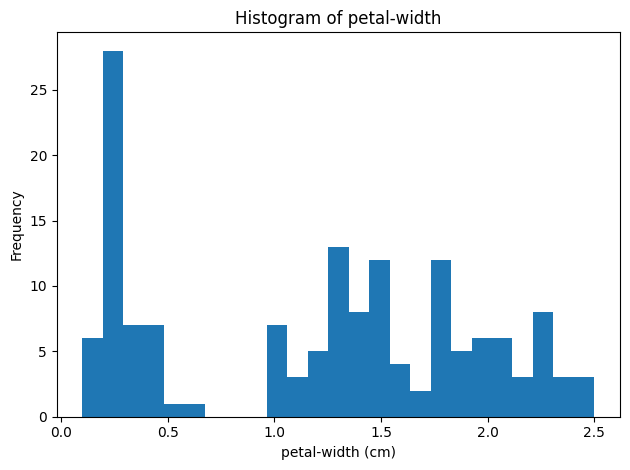

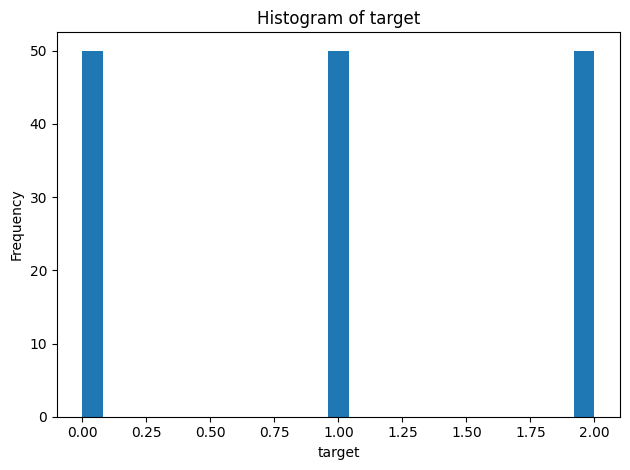

In [20]:
# YOUR CODE HERE

# Let's plot one histogram per column
for col in df_iris.columns:
    plt.figure()
    plt.hist(df_iris[col], bins=25)
    plt.title(f"Histogram of {col}")
    if col != 'target':
        plt.xlabel(col +" (cm)")
    else:
        plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

#### Histograms and Distribution Interpretation
I plotted a histogram for each column in the *Iris* dataset. The histograms give a quick visual sense of how each feature is distributed and whether it resembles any of the distributions we covered in the course.\
Below is my interpretation of each column:
* **sepal-length** <br/>
The histogram for *sepal-length* shows a shape that is somewhat bell-shaped but not perfectly symmetric.\
It has a noticeable spread around the middle values (around 5.0 to 6.5).\
While it doesn't match a perfect normal distribution (not a perfect bell curve), the distribution is closest to a **roughly normal distribution and shows a slight skew to the right.**
* **sepal-width** <br/>
The histogram for *sepal-width* shows most values clustered around 3.0 cm, with the frequencies gradually dropping off on both the lower and higher ends.\
The shape is not perfectly smooth, and there are a few small bumps, but overall it does not lean heavily to either side.\
Instead of being strongly skewed, it looks **roughly symmetric with some minor irregularities.** \
Because of this, I would say *sepal-width* is best described as an **approximately normal continuous distribution**, just not a perfectly ideal bell curve.
* **petal-length** <br/>
The histogram for *petal-length* shows two clearly separated groups: \
One tight peak appears at small values around 1.4–1.6 cm, which corresponds to *Iris Setosa*. \
A second, broader group extends roughly from 3.0 to 6.9 cm, representing the other two species.\
There is an empty gap between about 2.0 and 3.0 cm, so the two regions hardly overlap at all. \
Because of this strong separation and the presence of two distinct clusters, the distribution of *petal-length* is best described as **bimodal**, which is a specific **example of a multimodal distribution**
* **petal-width** <br/>
The histogram for *petal-width* looks very similar to *petal-length* in terms of structure.\
There is a tight cluster of very small values around 0.2–0.5 cm, and another broader cluster between 1.0 and 2.5 cm.\
The middle region is mostly empty, reinforcing the idea that the species fall into two separate groups.\
This produces another clear **bimodal distribution**, consistent with the **multimodal patterns**.
* **target (Species Label)** <br/>
The histogram for the *target* column displays three bars at the values 0, 1, and 2, with each bar having the same height.\
This distribution is **NOT** continuous at all.\
Instead, it represents a **categorical (discrete) distribution**, where each category occurs an equal number of times.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE